In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from pickle import load,dump
from keras import backend as K

In [4]:
df = pd.read_csv("C:/Users/Tyler/PycharmProjects/EE485_Final_Project/labeled_df.csv")
df = df.drop('Unnamed: 0', axis =1)

In [5]:
df.columns

Index(['R', 'G', 'B', 'Label'], dtype='object')

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df

,R,G,B,Label
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[137, 145, 184, 127, 167, 175, 149, 124, 196, ...",micronodules
1,"[255, 255, 255, 207, 140, 167, 188, 190, 167, ...","[255, 255, 160, 0, 0, 0, 0, 0, 0, 0, 0, 0, 141...","[196, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87,...",micronodules
2,"[167, 173, 152, 206, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 141, 255, 255, 255, 255, 255, 255...","[0, 0, 0, 0, 0, 87, 31, 16, 75, 180, 255, 255,...",micronodules
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[142, 55, 139, 175, 153, 129, 100, 126, 159, 1...",micronodules
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[159, 159, 161, 201, 210, 189, 205, 238, 191, ...",micronodules
...,...,...,...,...
90898,"[199, 153, 165, 191, 219, 204, 167, 177, 188, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 255, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 1...",emphysema
90899,"[188, 139, 124, 120, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 9, 255, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 0, 255, 173, 180, 150, 100, 191, ...",emphysema
90900,"[193, 200, 167, 175, 162, 183, 185, 164, 163, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 159, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema
90901,"[163, 203, 184, 199, 255, 221, 168, 154, 176, ...","[0, 0, 0, 0, 159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",emphysema


In [8]:
def makeIMG(n,string):
  Image1 = df[string].values[n]
  Image1 = Image1.replace('[','')
  Image1 = Image1.replace(']','')
  Image1 = Image1.split(",")
  Image1 = np.array(Image1).astype(float)
  Image1 = Image1.reshape(32,32)
  Image1 = Image1/255
  return Image1

In [9]:
Image1 = df['R'].values[0]
Image1 = Image1.replace('[','')
#print(Image1)
Image1 = Image1.replace(']','')
Image1 = Image1.split(",")
Image1 = np.array(Image1).astype(int)
Image1 = Image1.reshape(32,32)
Image1 = Image1/255
print(Image1)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.78823529 0.75686275 0.97647059 ... 0.57254902 0.59607843 0.6       ]
 [0.95686275 0.81960784 0.76862745 ... 0.50196078 0.50196078 0.50588235]
 [0.66666667 0.70980392 0.53333333 ... 0.6627451  0.70196078 0.68627451]]


In [10]:
images_rgb = []
for i in range(len(df)):
  images_rgb.append(np.dstack((makeIMG(i,'R'),makeIMG(i,'G'),makeIMG(i,'B'))))

'micronodules'

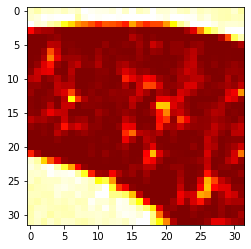

In [11]:
plt.imshow(images_rgb[7314])
df['Label'][7314]

In [12]:
targets = df['Label'].values

In [13]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(targets.reshape(-1,1))
enc.categories_

[array(['emphysema', 'fibrosis', 'ground_glass', 'healthy', 'micronodules'],
       dtype=object)]

In [14]:
#saving my encoder
##dump(enc,open('enc.pkl','wb'))

In [15]:
y_train = enc.transform(targets.reshape(-1,1)).toarray()

In [16]:
images_rgb_shuffle, y_train_shuffle = shuffle(images_rgb, y_train, random_state = 42)

In [17]:
np.array(images_rgb_shuffle).shape
y_train.shape

(90903, 5)

In [18]:
from sklearn.model_selection import train_test_split
train_x1, valid_x, train_y1, valid_y = train_test_split(np.array(images_rgb_shuffle), y_train_shuffle, test_size= .5, stratify=y_train_shuffle)

In [19]:
from keras.layers.core.flatten import Flatten
from keras import layers, models
model_int = models.Sequential([
    layers.InputLayer(input_shape=[32,32,3]),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),



    layers.Dense(5, activation='softmax')
])
model_int.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 50)                1

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import *
from keras import Sequential

In [21]:
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience=3, min_lr=0.0001)

In [22]:
# early_stopping_monitor = EarlyStopping(monitor = 'loss',patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor = 0.3, patience=3, min_lr=0.000001)

In [23]:
model_int.compile(loss='categorical_crossentropy',optimizer='Adam')
history1 = model_int.fit(train_x1,train_y1, epochs = 50, shuffle=True, callbacks=[early_stopping_monitor,reduce_lr], validation_data=(valid_x,valid_y), validation_freq=1)

Epoch 1/50
1421/1421 [==============================] - 7s 3ms/step - loss: 0.6775 - val_loss: 0.5086 - lr: 0.0010
Epoch 2/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.4557 - val_loss: 0.3959 - lr: 0.0010
Epoch 3/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.3831 - val_loss: 0.3731 - lr: 0.0010
Epoch 4/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.3332 - val_loss: 0.3894 - lr: 0.0010
Epoch 5/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.2995 - val_loss: 0.3443 - lr: 0.0010
Epoch 6/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.2694 - val_loss: 0.3079 - lr: 0.0010
Epoch 7/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.2431 - val_loss: 0.3427 - lr: 0.0010
Epoch 8/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.2203 - val_loss: 0.2781 - lr: 0.0010
Epoch 9/50
1421/1421 [==============================] - 5s 3ms/step - loss: 0.19

In [ ]:
model_int.compile(loss='categorical_crossentropy',optimizer='Adam')
history1 = model_int.fit(train_x1,train_y1, epochs = 20, shuffle=True)

Epoch 1/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0629
Epoch 2/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0519
Epoch 3/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0513
Epoch 4/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0452
Epoch 5/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0432
Epoch 6/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0441
Epoch 7/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0359
Epoch 8/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0419
Epoch 9/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0344
Epoch 10/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0357
Epoch 11/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0355
Epoch 12/20
1421/1421 [==============================] - 3s 2ms/step - loss: 0.0301
E

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
preds = model_int.predict(valid_x)
preds = enc.inverse_transform(preds)
print(classification_report(enc.inverse_transform(valid_y),preds, digits=4))
confusion_matrix(enc.inverse_transform(valid_y),preds)
ConfusionMatrixDisplay.from_predictions(enc.inverse_transform(valid_y),preds, normalize='true', cmap='winter', xticks_rotation= 'vertical')
plt.show()

In [ ]:
act = 'elu'
pad = 'same'
convul = (3,3)
initial = 'he_normal'
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
model = models.Sequential(
    [
     layers.InputLayer(input_shape=[32,32,3]),
     layers.BatchNormalization(),
     layers.Conv2D(64, convul, padding = pad, activation=leaky_relu, kernel_initializer=initial),
     layers.Conv2D(64, convul, padding = pad, activation=act, kernel_initializer=initial),
     layers.AvgPool2D(pool_size=2),
     layers.Conv2D(128, convul, padding = pad, activation=leaky_relu, kernel_initializer=initial),
     layers.Conv2D(128, convul, padding = pad, activation=act, kernel_initializer=initial),
     layers.AvgPool2D(pool_size=2),
     layers.BatchNormalization(),
     layers.Conv2D(256, convul, padding = pad, activation=leaky_relu, kernel_initializer=initial),
     layers.Conv2D(256, convul, padding = pad, activation=act, kernel_initializer=initial),
     layers.AvgPool2D(pool_size=2),
     layers.BatchNormalization(),
     layers.Flatten(),
     layers.Dense(200, activation=leaky_relu, kernel_initializer=initial),
     layers.Dropout(.4),
     layers.Dense(200, activation=act, kernel_initializer=initial),
     layers.Dropout(.4),
     layers.BatchNormalization(),
     layers.Dense(50, activation=leaky_relu, kernel_initializer=initial),
     layers.Dropout(.4),



     layers.Dense(5, activation='softmax')
    ]
)
model.summary()


In [ ]:
# act = 'elu'
# pad = 'same'
kernel = 3
pad = 'same'
initial = 'he_normal'
opt = 'adam'
def create_model(act = 'elu', drop = .4, filter = 64, nodes = 50, act2 = 'relu', convul_amount = 3, maxavg= True ):
    K.clear_session()
    model = Sequential()
    model.add(Input(shape=[32,32,3]))
    model.add(BatchNormalization())

    for layer_amount in range(1,convul_amount):
        model.add(Conv2D(filters = layer_amount*filter, kernel_size= kernel, padding = pad, activation=act2, kernel_initializer=initial))
        model.add(Conv2D(filters = layer_amount*filter, kernel_size= kernel, padding = pad, activation=act, kernel_initializer=initial))
        if maxavg:
            model.add(AvgPool2D(pool_size=2))
        else:
            model.add(MaxPool2D(pool_size=2))

    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(drop))
    model.add(Dense(units = 4*nodes, activation=act2, kernel_initializer=initial))
    model.add(Dense(units = 4*nodes, activation=act, kernel_initializer=initial))
    model.add(BatchNormalization())
    model.add(Dropout(drop))
    model.add(Dense(units = nodes, activation=act2, kernel_initializer=initial))
    model.add(Dropout(drop))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ["accuracy"])
    return model

In [ ]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
params = {
    'act':['elu',leaky_relu],
    'drop':[.3,.4],
    'filter':[32,64],
    'nodes':[25,50],
    'act2':['elu','relu'],
    'convul_amount':[3,4],
    'maxavg':[True,False],
    'batch_size':[8,16],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = KerasClassifier(build_fn = create_model,epochs = 7, verbose = 1)
grid = RandomizedSearchCV(estimator= model,param_distributions=params, n_iter=30, cv=3, verbose=10)
grid_results = grid.fit(train_x1,train_y1)

C:\Users\Tyler\AppData\Local\Temp\ipykernel_2840\3636745365.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,epochs = 7, verbose = 1)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START act=elu, act2=elu, batch_size=16, convul_amount=3, drop=0.3, filter=32, maxavg=False, nodes=50
Epoch 1/7
1899/1899 [==============================] - 12s 6ms/step - loss: 0.6821 - accuracy: 0.7668
Epoch 2/7
1899/1899 [==============================] - 10s 5ms/step - loss: 0.4344 - accuracy: 0.8525
Epoch 3/7
1899/1899 [==============================] - 9s 5ms/step - loss: 0.3558 - accuracy: 0.8782
Epoch 4/7
1899/1899 [==============================] - 10s 5ms/step - loss: 0.3035 - accuracy: 0.8965
Epoch 5/7
1899/1899 [==============================] - 10s 5ms/step - loss: 0.2594 - accuracy: 0.9081
Epoch 6/7
1899/1899 [==============================] - 11s 6ms/step - loss: 0.2135 - accuracy: 0.9252
Epoch 7/7
950/950 [==============================] - 2s 2ms/step - loss: 0.2533 - accuracy: 0.9132
[CV 1/3; 1/30] END act=elu, act2=elu, batch_size=16, convul_amount=3, drop=0.3, filter=32, maxavg=False, nodes=50

In [75]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

Best: 0.907937 using {'nodes': 50, 'maxavg': True, 'filter': 64, 'drop': 0.4, 'convul_amount': 3, 'batch_size': 16, 'act2': 'elu', 'act': 'elu'}


In [76]:
results = pd.DataFrame(grid_results.cv_results_['params'])
results['mean_test_score'] = grid_results.cv_results_['mean_test_score']
results.sort_values(by=['mean_test_score'], ascending=False)

,nodes,maxavg,filter,drop,convul_amount,batch_size,act2,act,mean_test_score
0,50,True,64,0.4,3,16,elu,elu,0.907937
12,25,False,32,0.4,4,8,relu,elu,0.903416
15,50,False,64,0.3,3,16,relu,<keras.layers.advanced_activations.LeakyReLU o...,0.899355
14,50,True,32,0.4,3,8,elu,elu,0.894986
13,50,False,32,0.4,3,8,elu,<keras.layers.advanced_activations.LeakyReLU o...,0.894262
4,25,False,64,0.4,3,16,relu,<keras.layers.advanced_activations.LeakyReLU o...,0.892989
1,25,False,32,0.3,4,8,relu,relu,0.889872
11,25,False,32,0.4,4,16,relu,<keras.layers.advanced_activations.LeakyReLU o...,0.888686
18,50,True,32,0.3,4,8,elu,relu,0.888050
7,25,True,32,0.3,3,8,relu,elu,0.884933


In [ ]:
results.to_csv('out.csv')

In [70]:
model.compile(loss='categorical_crossentropy',optimizer='Adam')
history2 = model.fit(train_x1,train_y1, epochs = 50, shuffle=True,callbacks=[early_stopping_monitor,reduce_lr], validation_data=(valid_x,valid_y) , validation_freq=1, batch_size=16)

Epoch 1/50
2841/2841 [==============================] - 24s 8ms/step - loss: 0.6930 - val_loss: 0.4829 - lr: 0.0010
Epoch 2/50
2841/2841 [==============================] - 23s 8ms/step - loss: 0.4369 - val_loss: 0.4386 - lr: 0.0010
Epoch 3/50
2841/2841 [==============================] - 22s 8ms/step - loss: 0.3546 - val_loss: 0.2335 - lr: 0.0010
Epoch 4/50
2841/2841 [==============================] - 23s 8ms/step - loss: 0.3058 - val_loss: 0.2096 - lr: 0.0010
Epoch 5/50
2841/2841 [==============================] - 25s 9ms/step - loss: 0.2544 - val_loss: 0.1763 - lr: 0.0010
Epoch 6/50
2841/2841 [==============================] - 23s 8ms/step - loss: 0.2193 - val_loss: 0.2810 - lr: 0.0010
Epoch 7/50
2841/2841 [==============================] - 22s 8ms/step - loss: 0.1826 - val_loss: 0.1312 - lr: 0.0010
Epoch 8/50
2841/2841 [==============================] - 24s 9ms/step - loss: 0.1586 - val_loss: 0.2738 - lr: 0.0010
Epoch 9/50
2841/2841 [==============================] - 25s 9ms/step - l

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='Adam')
history2 = model.fit(train_x1,train_y1, epochs = 50, shuffle=True,callbacks=[early_stopping_monitor,reduce_lr], batch_size=16)

Epoch 1/50
2841/2841 [==============================] - 19s 6ms/step - loss: 0.6944 - lr: 0.0010
Epoch 2/50
2841/2841 [==============================] - 17s 6ms/step - loss: 0.4375 - lr: 0.0010
Epoch 3/50
2841/2841 [==============================] - 16s 6ms/step - loss: 0.3614 - lr: 0.0010
Epoch 4/50
2841/2841 [==============================] - 18s 6ms/step - loss: 0.3145 - lr: 0.0010
Epoch 5/50
2841/2841 [==============================] - 18s 6ms/step - loss: 0.2632 - lr: 0.0010
Epoch 6/50
2841/2841 [==============================] - 17s 6ms/step - loss: 0.2280 - lr: 0.0010
Epoch 7/50
2841/2841 [==============================] - 16s 6ms/step - loss: 0.1939 - lr: 0.0010
Epoch 8/50
2841/2841 [==============================] - 15s 5ms/step - loss: 0.1628 - lr: 0.0010
Epoch 9/50
2841/2841 [==============================] - 17s 6ms/step - loss: 0.1460 - lr: 0.0010
Epoch 10/50
2841/2841 [==============================] - 17s 6ms/step - loss: 0.1279 - lr: 0.0010
Epoch 11/50
2841/2841 [======

              precision    recall  f1-score   support

   emphysema     0.9896    0.9800    0.9848      1353
    fibrosis     0.9937    0.9921    0.9929     10793
ground_glass     0.9887    0.9891    0.9889      7245
     healthy     0.9945    0.9962    0.9953      9624
micronodules     0.9957    0.9964    0.9961     16437

    accuracy                         0.9937     45452
   macro avg     0.9924    0.9908    0.9916     45452
weighted avg     0.9937    0.9937    0.9937     45452



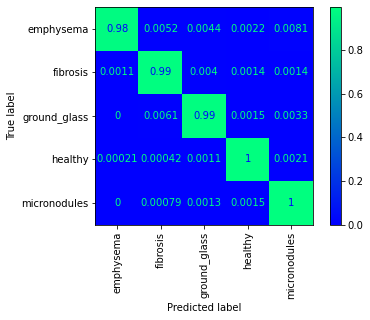

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
preds = model.predict(valid_x)
preds = enc.inverse_transform(preds)
print(classification_report(enc.inverse_transform(valid_y),preds, digits=4))
confusion_matrix(enc.inverse_transform(valid_y),preds)
ConfusionMatrixDisplay.from_predictions(enc.inverse_transform(valid_y),preds, normalize='true', cmap='winter', xticks_rotation= 'vertical', values_format= '.2g')
plt.show()

In [30]:
#saving my model
model.save('my_weights_9917_fall22022')

INFO:tensorflow:Assets written to: my_weights_9917_fall22022\assets


INFO:tensorflow:Assets written to: my_weights_9917_fall22022\assets


In [31]:
##Testing older models ##my best model to date
from keras.models import load_model
model_saved = load_model('my_weights_9981_e100.h5')
model_saved.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_28 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_83 (Conv2D)          (None, 16, 16, 128)     

              precision    recall  f1-score   support

   emphysema     0.9978    0.9970    0.9974      1353
    fibrosis     0.9969    0.9982    0.9975     10793
ground_glass     0.9968    0.9965    0.9967      7245
     healthy     0.9974    0.9983    0.9979      9624
micronodules     0.9994    0.9981    0.9988     16437

    accuracy                         0.9979     45452
   macro avg     0.9977    0.9977    0.9977     45452
weighted avg     0.9979    0.9979    0.9979     45452



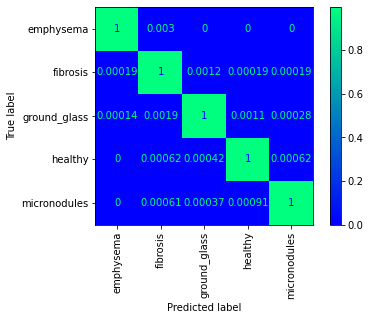

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
preds = model_saved.predict(valid_x)
preds = enc.inverse_transform(preds)
print(classification_report(enc.inverse_transform(valid_y),preds, digits=4))
confusion_matrix(enc.inverse_transform(valid_y),preds)
ConfusionMatrixDisplay.from_predictions(enc.inverse_transform(valid_y),preds, normalize='true', cmap='winter', xticks_rotation= 'vertical', values_format= '.2g')
plt.show()

In [33]:
##reports for entire dataset on initial model
from sklearn.metrics import classification_report, confusion_matrix
preds = model_saved.predict(np.array(images_rgb))
preds = enc.inverse_transform(preds)
print(classification_report(enc.inverse_transform(y_train),preds, digits=4))
print(confusion_matrix(enc.inverse_transform(y_train),preds))

              precision    recall  f1-score   support

   emphysema     0.9948    0.9974    0.9961      2706
    fibrosis     0.9970    0.9979    0.9974     21586
ground_glass     0.9967    0.9965    0.9966     14490
     healthy     0.9976    0.9988    0.9982     19247
micronodules     0.9993    0.9979    0.9986     32874

    accuracy                         0.9978     90903
   macro avg     0.9971    0.9977    0.9974     90903
weighted avg     0.9978    0.9978    0.9978     90903

[[ 2699     5     1     1     0]
 [   10 21540    26     5     5]
 [    1    28 14439    14     8]
 [    0     8     5 19223    11]
 [    3    24    16    26 32805]]


In [34]:
##reports over entire dataset on tuned model
from sklearn.metrics import classification_report, confusion_matrix
preds = model.predict(np.array(images_rgb))
preds = enc.inverse_transform(preds)
print(classification_report(enc.inverse_transform(y_train),preds, digits=4))
print(confusion_matrix(enc.inverse_transform(y_train),preds))

              precision    recall  f1-score   support

   emphysema     0.9839    0.9952    0.9895      2706
    fibrosis     0.9967    0.9943    0.9955     21586
ground_glass     0.9915    0.9932    0.9923     14490
     healthy     0.9965    0.9976    0.9970     19247
micronodules     0.9976    0.9968    0.9972     32874

    accuracy                         0.9958     90903
   macro avg     0.9932    0.9954    0.9943     90903
weighted avg     0.9958    0.9958    0.9958     90903

[[ 2693     4     5     1     3]
 [   29 21464    57    12    24]
 [    3    49 14391    19    28]
 [    9     3    10 19200    25]
 [    3    15    52    35 32769]]
